## Lingüística Computacional: Glottolog + Sails :)

## Tarea computacional!
### Distancias de Hamming para lenguas de Sudamérica

1. **Elegir 5 rasgos de Sails.** Descargue los datos en formato txt. La selección debe ser coherente con el fin de facilitar la interpretación de los resultados.
2. Lea los 5 archivos mediante **Pandas**. Con esta información, **construya un diccionario de rasgos.** Si el mismo procedimiento desarrollado en este notebook.
3. Elija **una lengua** para comparar.
4. Calcule **distancias de Hamming** entre **la lengua elegida y todas las demás.** Ordene las distancias de forma creciente. 
5. **Concluya** acerca de sus resultados. 
6. Entregue un **notebook** con sus cálculos. Trate de explicar muy bien tanto los pasos de análisis como las conclusiones finales. 

### 1. Leemos los archivos

In [1]:
import pandas as pd

In [2]:
import glob as glob

archivos_txt = glob.glob('*.txt')
archivos = {fp.replace('.txt',''):pd.read_csv(fp, sep='\t') for fp in archivos_txt}

In [3]:
for rasgo in archivos.keys():
    print(archivos[rasgo])

    iso-639-3                  name value description   latitude  longitude  \
0         agr              Aguaruna     0          no  -5.300440 -77.921790   
1         apu               Apurinã     0          no  -8.216920 -66.771410   
2         arl               Arabela     1         yes  -1.961260 -75.061170   
3         arh               Arhuaco     0          no  10.701840 -73.636290   
4         kwi          Awa-Cuaiquer     0          no   1.216525 -78.340135   
..        ...                   ...   ...         ...        ...        ...   
96        mtp  Wichí Lhamtés Nocten     1         yes -21.987995 -63.597110   
97        yaa             Yaminahua     0          no  -9.884597 -71.596433   
98        ame              Yanesha'     1         yes -10.545390 -75.314970   
99        yuq                 Yuqui     0          no -16.787520 -64.943820   
100       yuz              Yuracaré     0          no -16.747880 -65.122410   

           family  
0         Chicham  
1        Ar

### 2. Creamos diccionarios de rasgos

In [4]:
diccionarios = {}

for rasgo in archivos.keys():
    diccionario_rasgo = archivos[rasgo]
    nombre_valor = dict(zip(diccionario_rasgo['name'],diccionario_rasgo['value']))
    diccionarios[rasgo] = nombre_valor

In [12]:
diccionarios['NP830-c']

{'Aguaruna': '0',
 'Apurinã': '0',
 'Arabela': '1',
 'Arhuaco': '0',
 'Awa-Cuaiquer': '0',
 'Ayacucho Quechua': '0',
 'Ayoreo': '1',
 'Baure': '1',
 'Bora': '1',
 'Bororo': '1',
 'Cajamarca Quechua': '0',
 'Callawalla': '0',
 'Canela': '1',
 'Cavineña': '0',
 'Central Aymara': '0',
 'Chamacoco': '0',
 'Chipaya': '0',
 'Cholón': '1',
 'Cocama-Cocamilla': '0',
 'Cofán': '0',
 'Cubeo': '1',
 'Cusco Quechua': '0',
 'Desano': '1',
 'Dâw': '?',
 'Emerillon': '0',
 'Ese Ejja': '0',
 'Gavião Do Jiparaná': '0',
 'Hixkaryána': '0',
 'Huallaga Huánuco Quechua': '0',
 'Huangascar-Topara-Yauyos Quechua': '0',
 'Huaylas Ancash Quechua': '0',
 'Hupdë': '1',
 'Imbabura Highland Quichua': '0',
 'Inga': '0',
 'Iquito': '0',
 'Itonama': '1',
 'Jamamadí': '0',
 'Jaqaru': '0',
 'Jauja Wanca Quechua': '0',
 'Kadiwéu': '1',
 'Kamayurá': '?',
 'Kanoê': '1',
 'Karitiâna': '0',
 'Karo (Brazil)': '1',
 'Kwaza': '1',
 'Lakondê': '1',
 'Lao': '1',
 'Leco': '0',
 'Maca': '0',
 'Mamaindé': '1',
 'Mapudungun': '0',
 

In [13]:
## juntamos todas las lenguas

rasgos = {}

for rasgo in diccionarios.keys():
    lenguas = list(diccionarios[rasgo].keys())
    for lengua in lenguas:
        rasgos[lengua] = {}

In [14]:
len(rasgos)

101

In [15]:
for rasgo in diccionarios.keys():
    for lengua in rasgos.keys():
        if lengua in diccionarios[rasgo].keys():
            rasgos[lengua][rasgo]=diccionarios[rasgo][lengua]

In [16]:
rasgos

{'Aguaruna': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP833-cip': nan,
  'NP834-cdm': nan,
  'NP835-cpc': nan,
  'NP836-cde': nan,
  'NP837-cvp': nan,
  'NP838-cdf': nan,
  'NP839-caf': nan},
 'Apurinã': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP833-cip': nan,
  'NP834-cdm': nan,
  'NP835-cpc': nan,
  'NP836-cde': nan,
  'NP837-cvp': nan,
  'NP838-cdf': nan,
  'NP839-caf': nan},
 'Arabela': {'NP830-c': '1',
  'NP831-cn': '?',
  'NP832-cno': '?',
  'NP833-cip': '?',
  'NP834-cdm': '1',
  'NP835-cpc': '?',
  'NP836-cde': '?',
  'NP837-cvp': '1',
  'NP838-cdf': '0',
  'NP839-caf': '1'},
 'Arhuaco': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP833-cip': nan,
  'NP834-cdm': nan,
  'NP835-cpc': nan,
  'NP836-cde': nan,
  'NP837-cvp': nan,
  'NP838-cdf': nan,
  'NP839-caf': nan},
 'Awa-Cuaiquer': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP833-cip': nan,
  'NP834-cdm': nan,
  'NP835-cpc': nan,
  'NP836-cde': nan,
  'NP837-c

In [17]:
rasgos['Tariana']

{'NP830-c': '1',
 'NP831-cn': 'C',
 'NP832-cno': 'C',
 'NP833-cip': '1',
 'NP834-cdm': '1',
 'NP835-cpc': 'C',
 'NP836-cde': 'C',
 'NP837-cvp': '1',
 'NP838-cdf': '1',
 'NP839-caf': '1'}

In [18]:
rasgos['Chipaya']

{'NP830-c': '0',
 'NP831-cn': '?',
 'NP832-cno': '?',
 'NP833-cip': '?',
 'NP834-cdm': '?',
 'NP835-cpc': '?',
 'NP836-cde': '?',
 'NP837-cvp': '?',
 'NP838-cdf': '?',
 'NP839-caf': '?'}

### 3. Distancias

In [19]:
## distancia de Hamming!

def hamming(nombre1,nombre2):
    ## número de rasgos en que las lenguas difieren
    d = 0
    ## número total de rasgos en común
    n = 0
    ## accedemos a los diccionarios de rasgos
    lengua1 = rasgos[nombre1]
    lengua2 = rasgos[nombre2]
    ## contamos con un ciclo for
    for rasgo in lengua1.keys():
        ## nos preguntamos si rasgo pertenece a ambas lenguas
        if rasgo in lengua2.keys():
            ## revisamos si poseen valores distintos
            if lengua1[rasgo] != lengua2[rasgo]:
                ## en este caso sumamos 1 a d
                d += 1.0
            ## número total de rasgos
            n += 1.0
    ## entregamos la división entre el número rasgos en que las lenguas difieren y el número total de rasgos comunes
    return d/n

In [20]:
hamming('Tariana','Chipaya')

1.0

In [21]:
lengua_comp = 'Tariana'

In [22]:
distancias = {}

In [23]:
for lengua in rasgos.keys():
    distancias[lengua]=hamming(lengua_comp,lengua)

In [24]:
distancias_ordenadas = dict(sorted(distancias.items(), key=lambda item: item[1]))

In [25]:
distancias_ordenadas

{'Bora': 0.0,
 'Tariana': 0.0,
 'Desano': 0.1,
 'Kwaza': 0.1,
 'Lakondê': 0.1,
 'Baure': 0.3,
 'Cubeo': 0.3,
 'Movima': 0.3,
 'Siona-Tetete': 0.4,
 "Yanesha'": 0.4,
 'Arabela': 0.6,
 'Hupdë': 0.6,
 'Kanoê': 0.6,
 'Mamaindé': 0.6,
 'Sabanê': 0.6,
 'Itonama': 0.7,
 'Ninam': 0.7,
 'Puinave': 0.7,
 'Tsafiki': 0.7,
 'Bororo': 0.8,
 'Cholón': 0.8,
 'Mocoví': 0.8,
 'Pilagá': 0.8,
 'Toba': 0.8,
 'Ayoreo': 0.9,
 'Canela': 0.9,
 'Kadiwéu': 0.9,
 'Karo (Brazil)': 0.9,
 'Lao': 0.9,
 'Mochica': 0.9,
 'Muniche': 0.9,
 'Panare': 0.9,
 'Wichí Lhamtés Nocten': 0.9,
 'Aguaruna': 1.0,
 'Apurinã': 1.0,
 'Arhuaco': 1.0,
 'Awa-Cuaiquer': 1.0,
 'Ayacucho Quechua': 1.0,
 'Cajamarca Quechua': 1.0,
 'Callawalla': 1.0,
 'Cavineña': 1.0,
 'Central Aymara': 1.0,
 'Chamacoco': 1.0,
 'Chipaya': 1.0,
 'Cocama-Cocamilla': 1.0,
 'Cofán': 1.0,
 'Cusco Quechua': 1.0,
 'Dâw': 1.0,
 'Emerillon': 1.0,
 'Ese Ejja': 1.0,
 'Gavião Do Jiparaná': 1.0,
 'Hixkaryána': 1.0,
 'Huallaga Huánuco Quechua': 1.0,
 'Huangascar-Topara-Yauy

### 4. Visualización 1

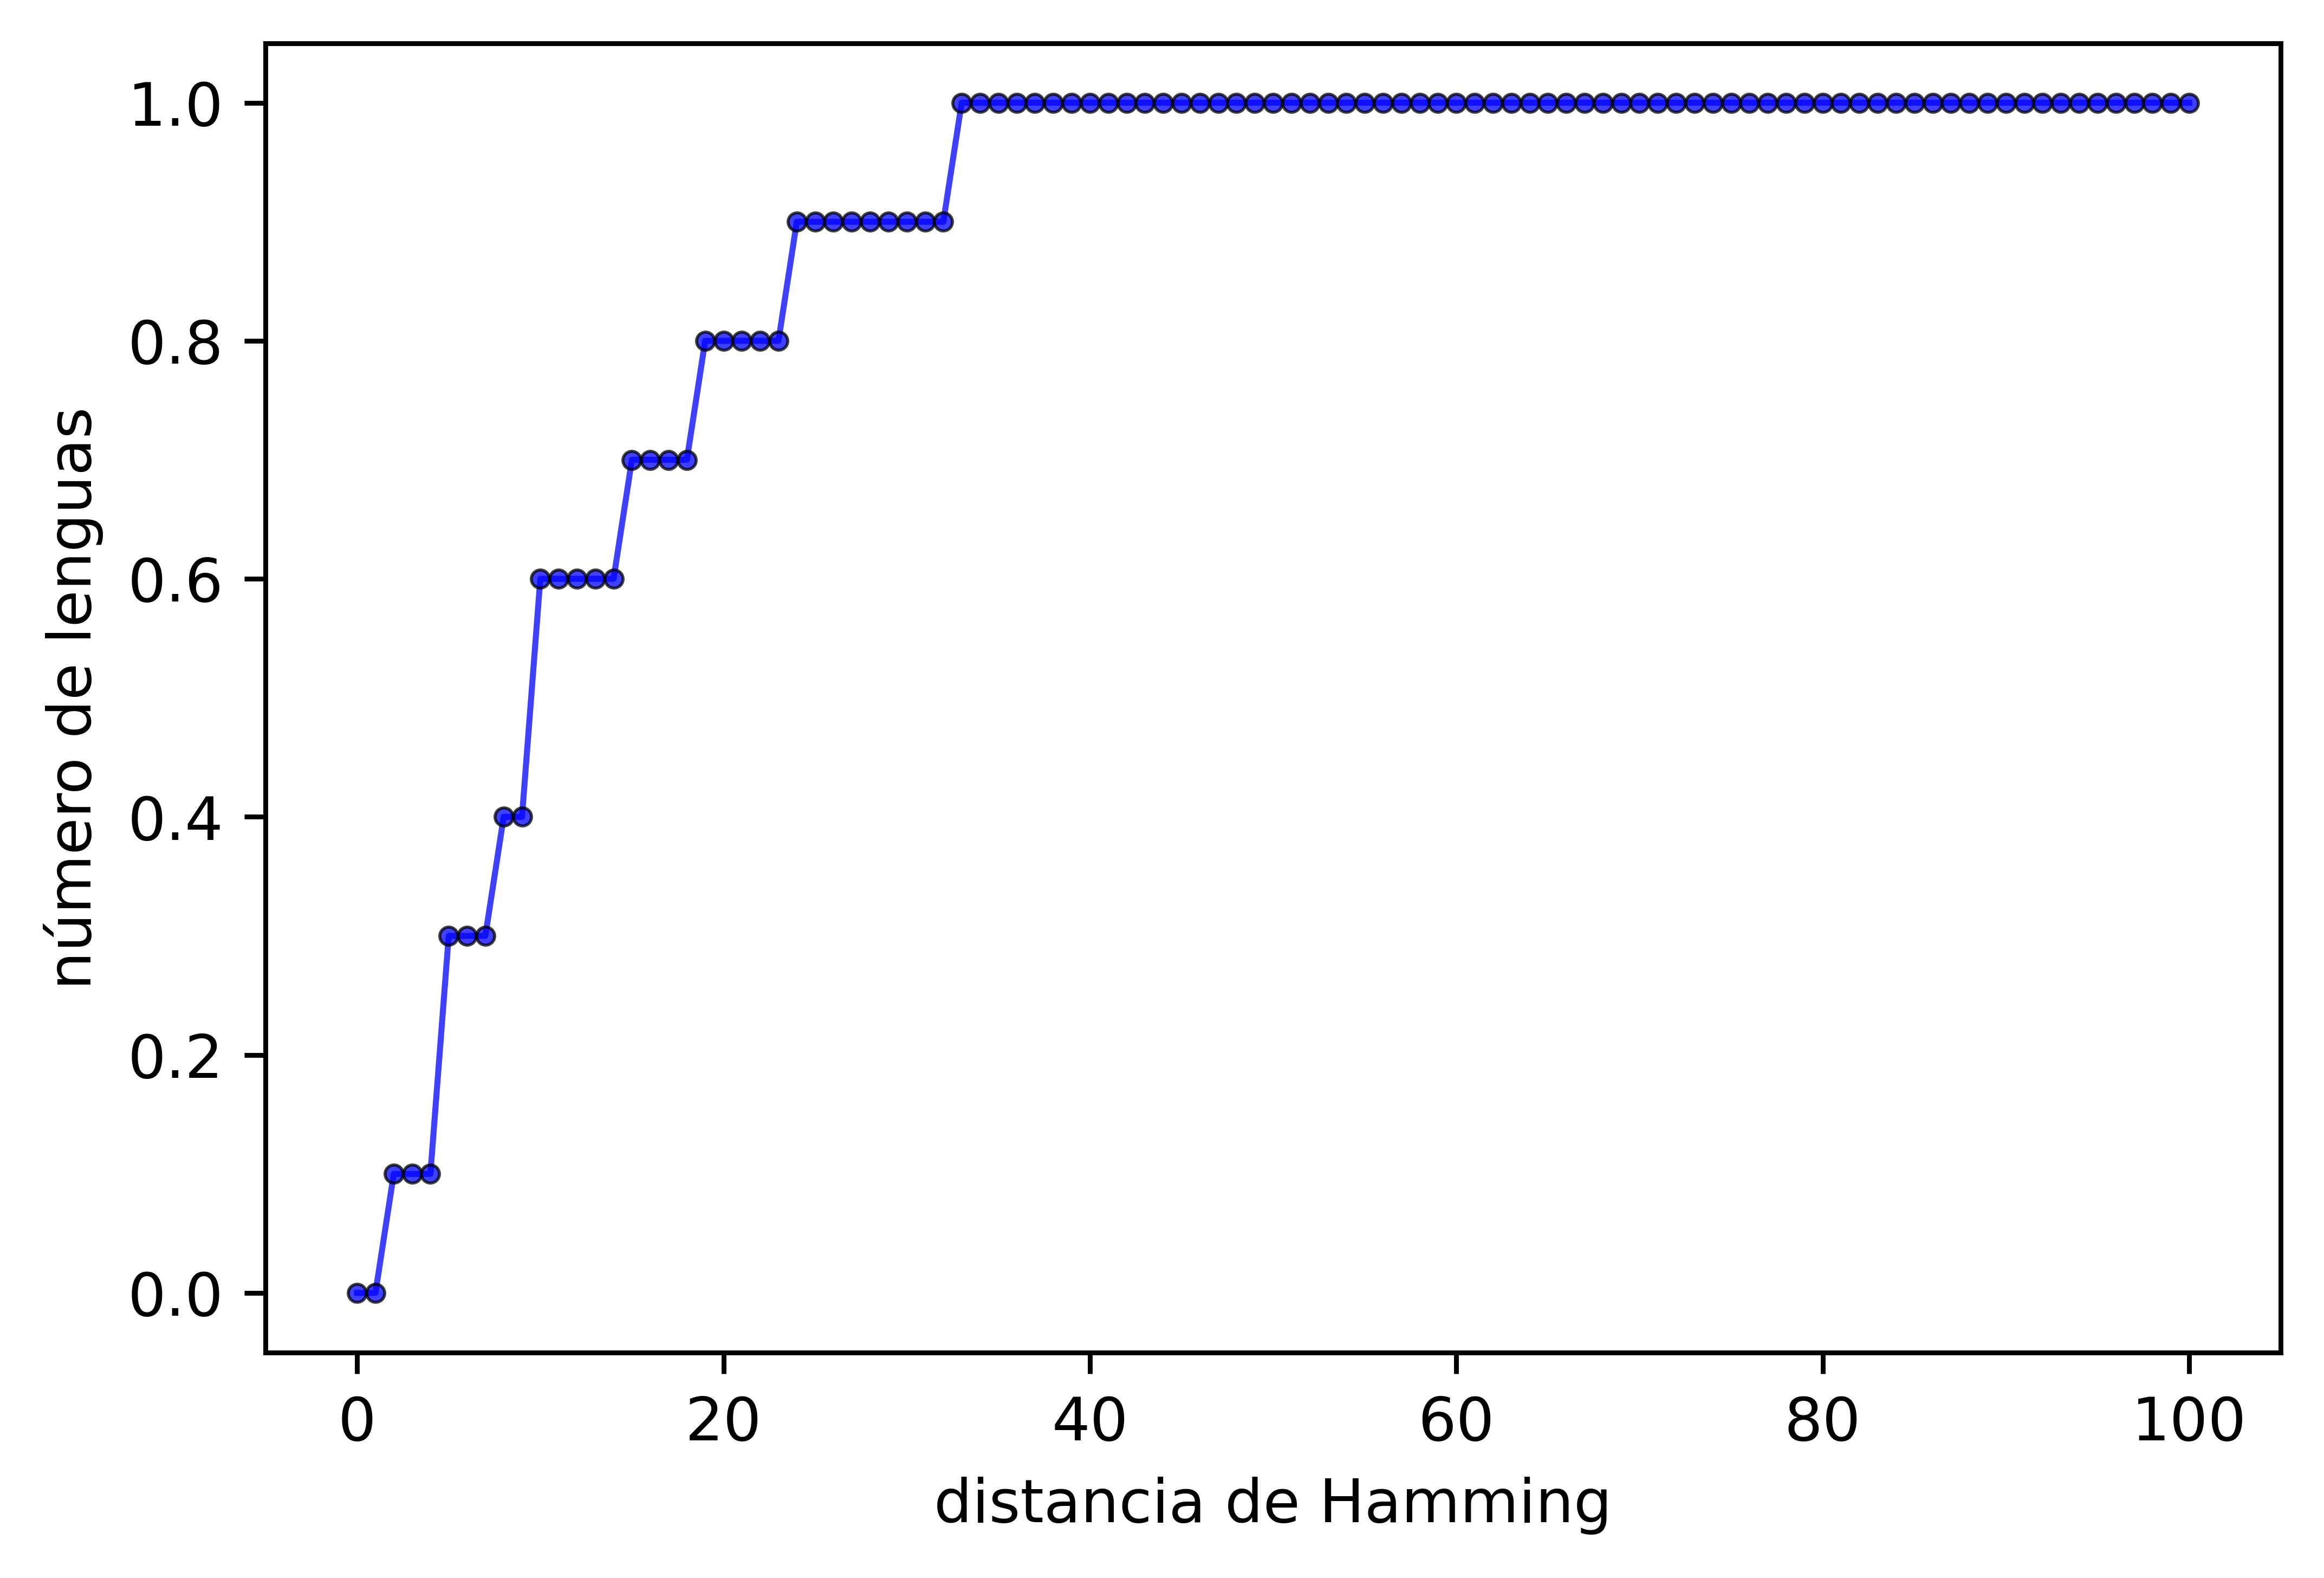

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.plot(range(len(distancias_ordenadas)),distancias_ordenadas.values(),marker='o',color='blue',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full')

plt.xlabel(r'distancia de Hamming',fontsize=10)
plt.ylabel(r'número de lenguas',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 5. Visualización 2

In [27]:
lenguajes = pd.read_csv('languages.csv', sep=',')

In [28]:
lenguajes

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name,Status,Parent_Glottocode
0,guri1248,Guriaso,Papunesia,-3.571800,141.597000,guri1248,grx,NaN,NaN,shifting,NaN
1,pawa1255,Pawaia,Papunesia,-6.880210,145.081000,pawa1255,pwa,NaN,NaN,shifting,NaN
2,guam1236,Guamo,South America,8.235103,-67.401875,guam1236,NaN,NaN,NaN,extinct,NaN
3,dama1272,Damal,Papunesia,-4.173450,137.496000,dama1272,uhn,NaN,NaN,shifting,NaN
4,puqu1242,Puquina,South America,-15.899200,-69.961100,puqu1242,puq,NaN,NaN,extinct,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8113,guan1268,Guana (Paraguay),South America,-21.980300,-58.065400,guan1268,gva,leng1261,Lengua-Mascoy,shifting,east2852
8114,sana1298,Sanapaná,South America,-22.490000,-58.380000,sana1298,spn,leng1261,Lengua-Mascoy,shifting,east2852
8115,anga1316,Angaité,South America,-22.850000,-58.450000,anga1316,aqt,leng1261,Lengua-Mascoy,moribund,east2852
8116,gily1242,Amur Nivkh,Eurasia,52.590000,140.681000,gily1242,niv,nivk1234,Nivkh,moribund,nivk1234


In [29]:
## veamos las columnas

lenguajes.columns

Index(['ID', 'Name', 'Macroarea', 'Latitude', 'Longitude', 'Glottocode',
       'ISO639P3code', 'Family_Glottocode', 'Family_Name', 'Status',
       'Parent_Glottocode'],
      dtype='object')

In [30]:
## ¿Y si filtramos por lenguas de Sudamérica?

SA = lenguajes[lenguajes['Macroarea']=='South America']

In [31]:
## nombres de lenguas
nombres = list(SA['Name'])

In [32]:
## hagamos un gráfico de posiciones geográficas :)

latitud = list(SA['Latitude'])
longitud = list(SA['Longitude'])

In [33]:
latitud_longitud = list(zip(latitud,longitud))

In [34]:
latitud_longitud

[(8.2351027, -67.4018753),
 (-15.8992, -69.9611),
 (-27.4063, -58.9661),
 (4.0673594, -62.8676118),
 (-13.8115, -65.6348),
 (-5.7441796, -76.426712),
 (3.436864, -76.522636),
 (-13.2482, -65.4822),
 (-55.2748, -68.2648),
 (-23.0, -69.0),
 (-25.221839000000003, -61.887818),
 (-12.80431, -64.35748000000001),
 (3.969231, -64.235892),
 (-8.953642, -38.2742287),
 (7.50851, -59.3528),
 (-13.636709, -62.2020909),
 (0.276675, -77.0643),
 (-12.7178, -57.9806),
 (-8.999989999999999, -37.0167),
 (3.92974, -67.6886),
 (7.223905999999999, -71.420238),
 (0.834931, -79.778137),
 (1.14537, -76.8931),
 (-0.53751, -72.0869),
 (-6.7771300000000005, -61.8167),
 (-8.01667, -79.0),
 (-15.0092, -67.8818),
 (-24.315323100000004, -50.5580261),
 (-5.568969, -80.82824699999999),
 (-16.769554, -61.817795),
 (-8.6606156, -37.0869089),
 (7.10677, -67.5996),
 (-3.22497, -75.5603),
 (-4.44006, -75.4211),
 (2.716, -73.768),
 (-12.6695, -60.5353),
 (-4.23835, -76.9347),
 (-12.1789, -64.5812),
 (8.848165, -70.975342),
 

In [35]:
dict_lat_lon = dict(zip(nombres,latitud_longitud))

In [36]:
dict_lat_lon = {lengua:dict_lat_lon[lengua] for lengua in distancias if lengua in dict_lat_lon.keys()}

In [37]:
len(dict_lat_lon)

90

In [38]:
dict_lat_lon

{'Aguaruna': (-5.30044, -77.9218),
 'Apurinã': (-8.21692, -66.7714),
 'Arabela': (-1.96126, -75.0612),
 'Arhuaco': (10.7018, -73.6363),
 'Awa-Cuaiquer': (1.21652, -78.3401),
 'Ayacucho Quechua': (-13.84714, -74.32245999999999),
 'Ayoreo': (-19.220055, -60.21749499999999),
 'Baure': (-13.1278, -64.1838),
 'Bora': (-2.000259, -72.25706600000001),
 'Bororo': (-16.6029, -55.2004),
 'Cajamarca Quechua': (-7.093139999999999, -78.3214),
 'Callawalla': (-15.88451, -68.10176),
 'Cavineña': (-13.3544, -66.6277),
 'Central Aymara': (-17.0, -68.5),
 'Chamacoco': (-20.5899, -58.2005),
 'Chipaya': (-18.73951, -67.89633),
 'Cholón': (-9.23129, -75.9621),
 'Cocama-Cocamilla': (-4.5, -74.0),
 'Cofán': (0.276675, -77.0643),
 'Cubeo': (1.32382, -70.1939),
 'Cusco Quechua': (-14.0853, -71.7663),
 'Desano': (0.58157, -69.4955),
 'Dâw': (-0.1177, -67.2934),
 'Ese Ejja': (-11.7268, -67.515),
 'Gavião Do Jiparaná': (-10.7235, -61.6752),
 'Hixkaryána': (-0.16265, -58.80153000000001),
 'Huallaga Huánuco Quechua

In [39]:
Y = list(zip(*dict_lat_lon.values()))[0]
X = list(zip(*dict_lat_lon.values()))[1]

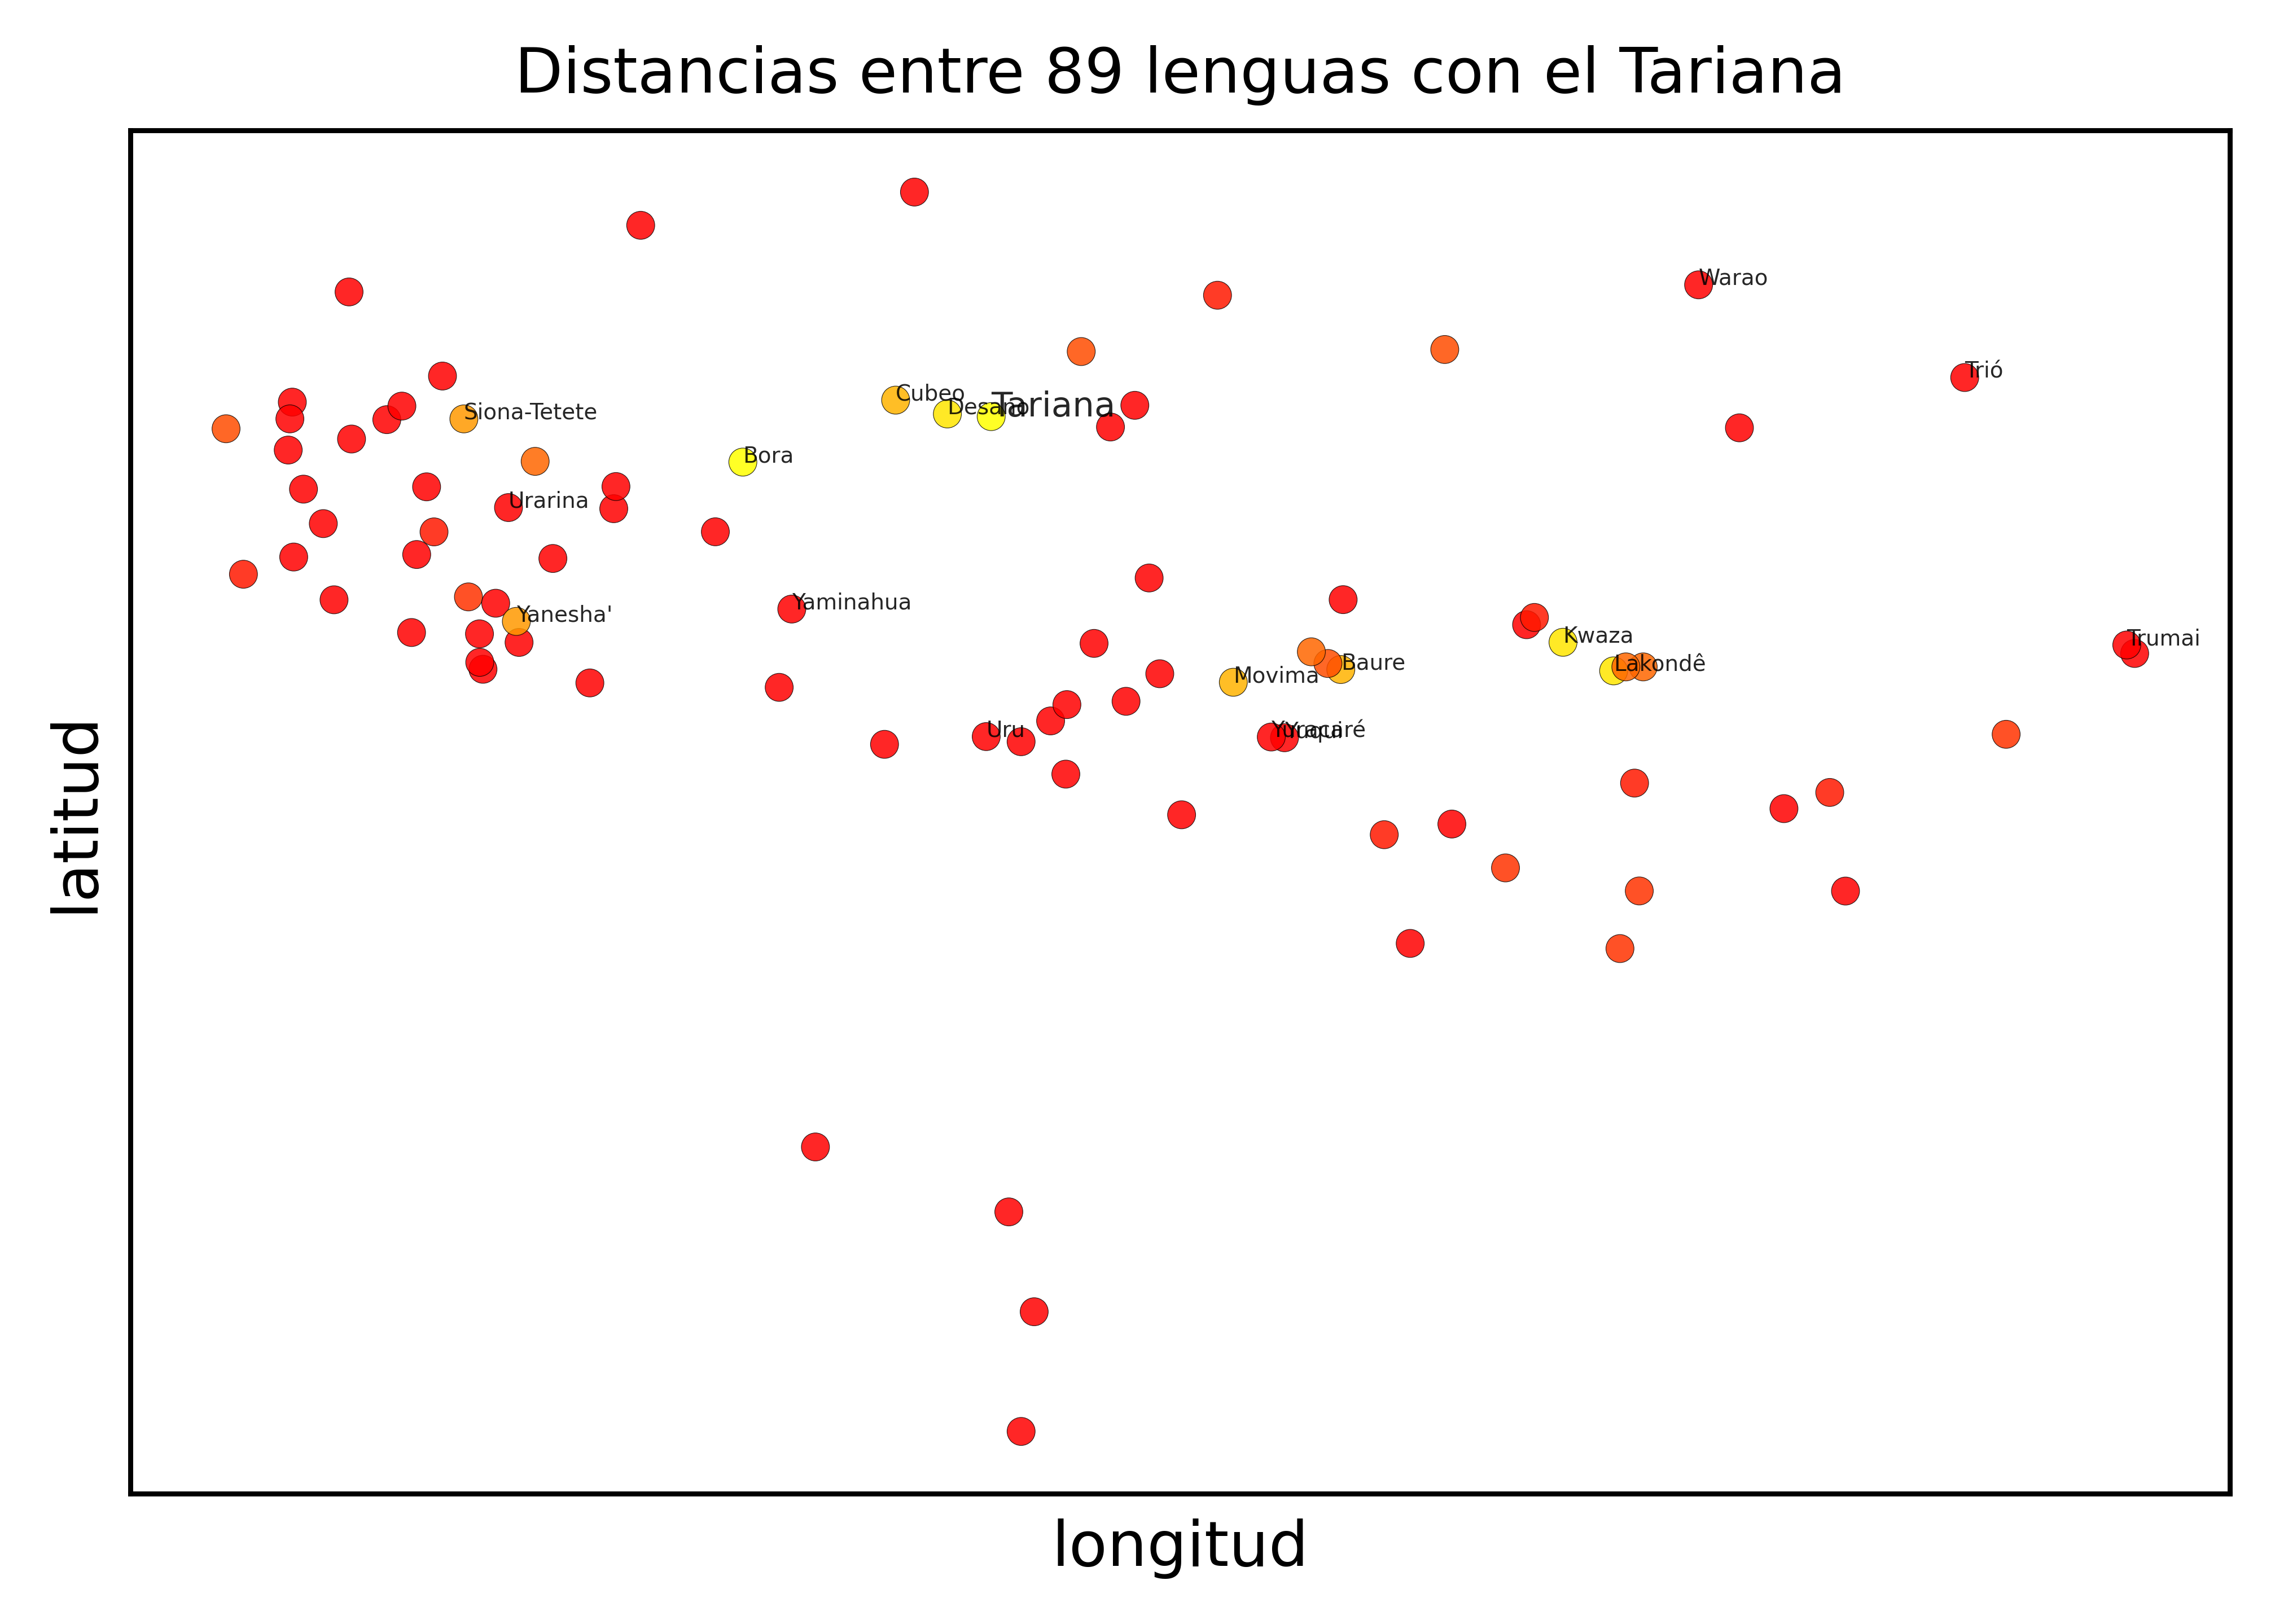

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for lengua in list(distancias_ordenadas.keys())[:10]+list(distancias_ordenadas.keys())[-10:]:
    if lengua in dict_lat_lon.keys():
        if lengua == lengua_comp:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=5.5, alpha=0.85)
        else:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=3.5, alpha=0.85)

ax.scatter(X,Y,c=[distancias[lengua] for lengua in dict_lat_lon.keys()], s=20, edgecolors='k',linewidths=0.1, cmap=plt.cm.get_cmap('autumn').reversed(),alpha=0.85)

plt.grid(False)
plt.title('Distancias entre {}'.format(len(dict_lat_lon)-1)+' lenguas con el {}'.format(lengua_comp),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'latitud',fontsize=10)
plt.xlabel(r'longitud',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('mapa_distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 6. Visualización 3

In [41]:
!pip install haversine

In [42]:
from haversine import haversine

In [43]:
distancias_geo_lengua_comp = {}

for lengua in dict_lat_lon.keys():
    distancias_geo_lengua_comp[lengua]=haversine(dict_lat_lon[lengua],dict_lat_lon[lengua_comp])

In [44]:
distancias_geo_lengua_comp

{'Aguaruna': 1187.536945351553,
 'Apurinã': 991.2278430000017,
 'Arabela': 734.7584209121904,
 'Arhuaco': 1255.1797854674414,
 'Awa-Cuaiquer': 1052.6531090892063,
 'Ayacucho Quechua': 1697.0604782244698,
 'Ayoreo': 2382.7685017500316,
 'Baure': 1595.9261850825444,
 'Bora': 461.0748018093374,
 'Bororo': 2418.561502857171,
 'Cajamarca Quechua': 1338.9982220060747,
 'Callawalla': 1817.3647272333335,
 'Cavineña': 1554.2762706993199,
 'Central Aymara': 1939.7707615044458,
 'Chamacoco': 2612.370984648201,
 'Chipaya': 2135.5292185112507,
 'Cholón': 1329.4162878767788,
 'Cocama-Cocamilla': 788.8118956049416,
 'Cofán': 907.5270684586079,
 'Cubeo': 173.82300117733777,
 'Cusco Quechua': 1645.6162465542034,
 'Desano': 67.60000422507322,
 'Dâw': 189.55071407608818,
 'Ese Ejja': 1361.5828549007458,
 'Gavião Do Jiparaná': 1476.4191991833409,
 'Hixkaryána': 1125.3570202439741,
 'Huallaga Huánuco Quechua': 1337.050310273989,
 'Huangascar-Topara-Yauyos Quechua': 1686.3961276615526,
 'Huaylas Ancash Quec

In [45]:
dict_geo_tip = {}

for lengua in distancias_geo_lengua_comp.keys():
    dict_geo_tip[lengua]=[distancias_geo_lengua_comp[lengua],distancias[lengua]]

In [46]:
dict_geo_tip

{'Aguaruna': [1187.536945351553, 1.0],
 'Apurinã': [991.2278430000017, 1.0],
 'Arabela': [734.7584209121904, 0.6],
 'Arhuaco': [1255.1797854674414, 1.0],
 'Awa-Cuaiquer': [1052.6531090892063, 1.0],
 'Ayacucho Quechua': [1697.0604782244698, 1.0],
 'Ayoreo': [2382.7685017500316, 0.9],
 'Baure': [1595.9261850825444, 0.3],
 'Bora': [461.0748018093374, 0.0],
 'Bororo': [2418.561502857171, 0.8],
 'Cajamarca Quechua': [1338.9982220060747, 1.0],
 'Callawalla': [1817.3647272333335, 1.0],
 'Cavineña': [1554.2762706993199, 1.0],
 'Central Aymara': [1939.7707615044458, 1.0],
 'Chamacoco': [2612.370984648201, 1.0],
 'Chipaya': [2135.5292185112507, 1.0],
 'Cholón': [1329.4162878767788, 0.8],
 'Cocama-Cocamilla': [788.8118956049416, 1.0],
 'Cofán': [907.5270684586079, 1.0],
 'Cubeo': [173.82300117733777, 0.3],
 'Cusco Quechua': [1645.6162465542034, 1.0],
 'Desano': [67.60000422507322, 0.1],
 'Dâw': [189.55071407608818, 1.0],
 'Ese Ejja': [1361.5828549007458, 1.0],
 'Gavião Do Jiparaná': [1476.4191991

In [47]:
import random

X = [dict_geo_tip[localidad][0] for localidad in dict_geo_tip.keys()]
Y = [dict_geo_tip[localidad][1]+random.random()/50 for localidad in dict_geo_tip.keys()]

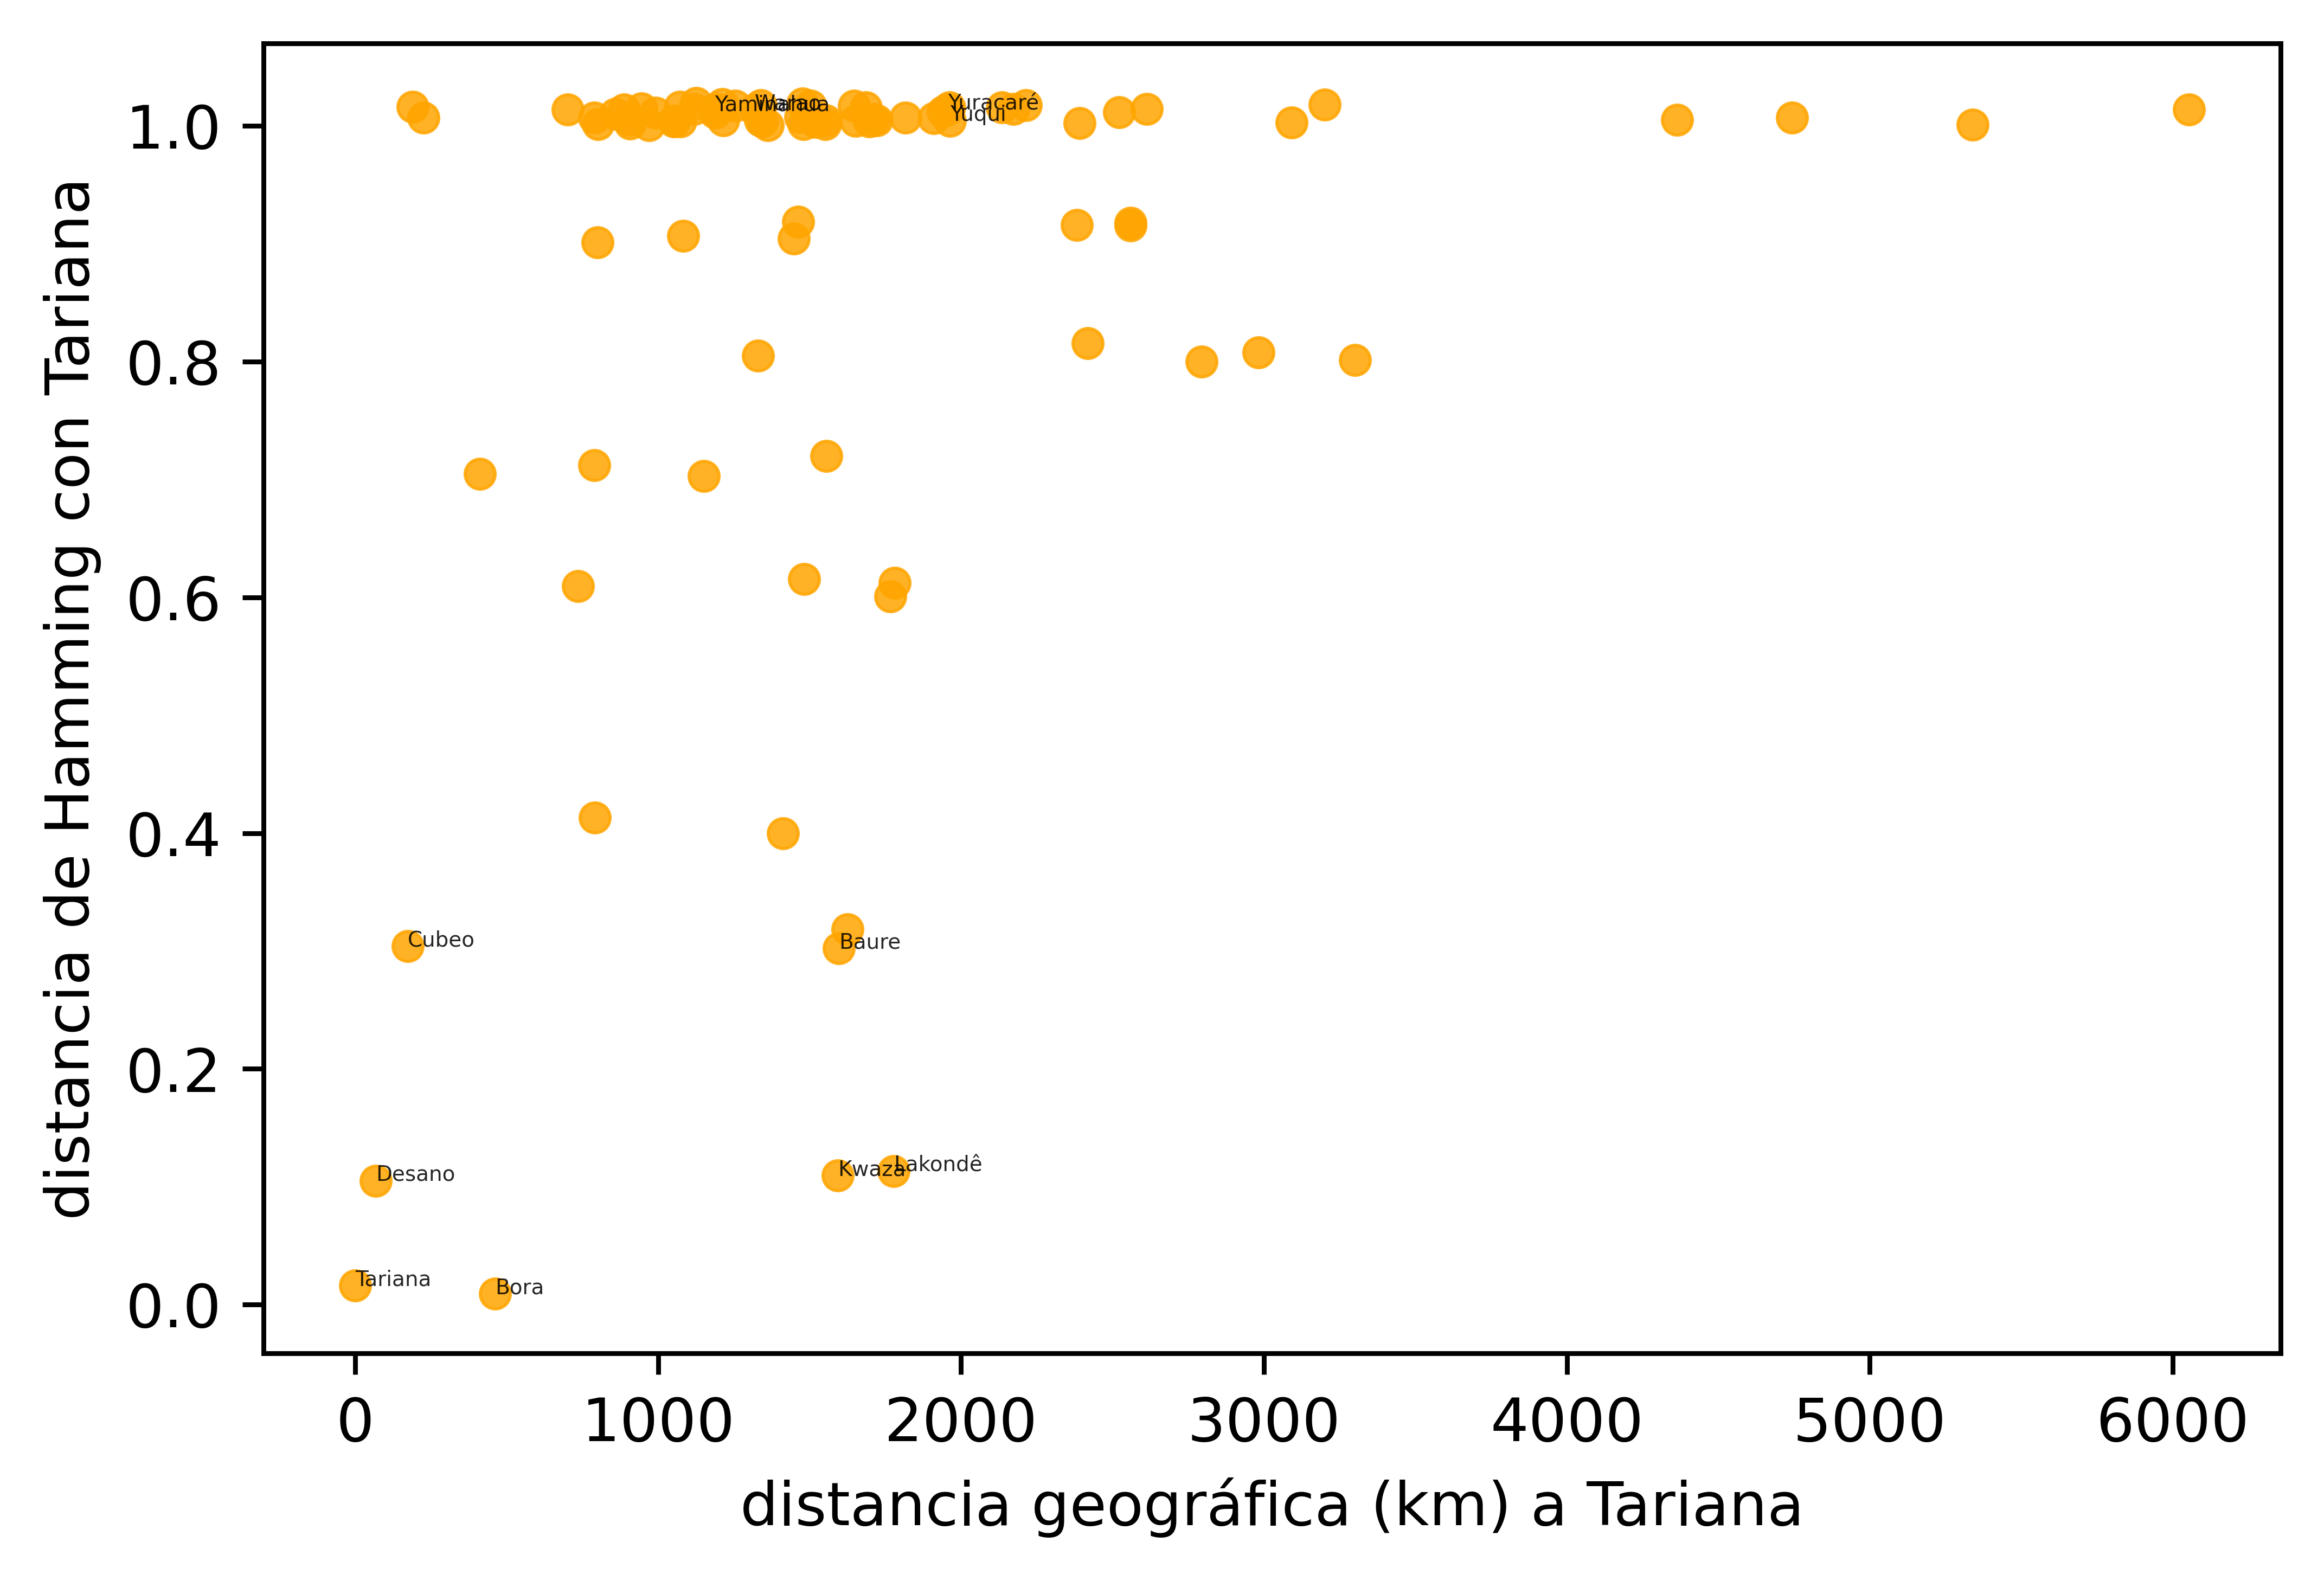

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for lengua in list(distancias_ordenadas.keys())[:7]+list(distancias_ordenadas.keys())[-5:]:
    if lengua in dict_geo_tip.keys():
        i = list(dict_geo_tip.keys()).index(lengua)
        ax.annotate(lengua, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Hamming con {}'.format(lengua_comp),fontsize=10)
plt.xlabel(r'distancia geográfica (km) a {}'.format(lengua_comp),fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('geo_tip.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()